In [3]:
import gym
from gym.envs.toy_text import frozen_lake
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
from hiive.mdptoolbox.example import forest
# from mdptoolbox_mod.mdp import QLearning
import copy

In [7]:
P, R = forest(S=10)

In [8]:
gamma_list = [0.95] + [round(1+(0.1*-i), 1) for i in range(1,10)]
f_v_solvers = {}
for g in gamma_list:
    vi_solver = ValueIteration(P, R, gamma=g, epsilon=1.0e-5)
    vi_solver.run()
    f_v_solvers[g] = vi_solver
#     plot_frozen_lake(map_small_2, vi_solver.policy, vi_solver.V, small_size, "VI gamma " + str(round(g, 2)) + " " + str(np.mean(vi_solver.V)))
#     vi_solver.run_stats

In [9]:
f_v_solvers[0.95].run_stats

[{'State': None,
  'Action': None,
  'Reward': 4.0,
  'Error': 4.0,
  'Time': 0.0,
  'Max V': 4.0,
  'Mean V': 1.2,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 7.42,
  'Error': 3.42,
  'Time': 0.0,
  'Max V': 7.42,
  'Mean V': 1.8695,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 10.425324999999999,
  'Error': 2.9240999999999993,
  'Time': 0.0,
  'Max V': 10.425324999999999,
  'Mean V': 3.16657,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 13.00259425,
  'Error': 2.5001055000000005,
  'Time': 0.0010018348693847656,
  'Max V': 13.00259425,
  'Mean V': 4.1331760875,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 15.272867520624999,
  'Error': 2.1375902024999998,
  'Time': 0.0010018348693847656,
  'Max V': 15.272867520624999,
  'Mean V': 5.3880940119375,
  'Iteration': 5},
 {'State': None,
  'Action': None,
  'Reward': 17.22655605848125,
  'Error': 1.8276396231375016,
  'Time': 0.0010018348693847656,
  'Max 

Text(0, 0.5, 'Reward')

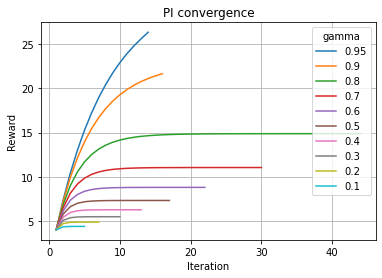

In [10]:
plt.figure()
# plt.semilogx()
plt.grid()
for g in gamma_list:
    stat = f_v_solvers[g].run_stats
    iterations = [s['Iteration'] for s in stat]
    iterations_rewards = [s['Reward'] for s in stat]
    plt.plot(iterations, iterations_rewards)
plt.legend(gamma_list, title="gamma")
plt.title("PI convergence")
plt.xlabel("Iteration")
plt.ylabel("Reward")

Text(0, 0.5, 'Time')

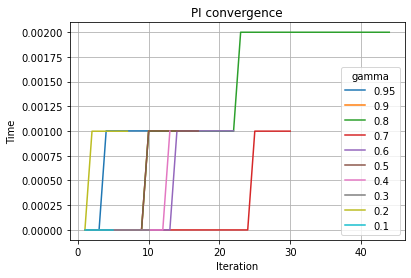

In [11]:
plt.figure()
# plt.semilogx()
plt.grid()
for g in gamma_list:
    stat = f_v_solvers[g].run_stats
    iterations = [s['Iteration'] for s in stat]
    iterations_rewards = [s['Time'] for s in stat]
    plt.plot(iterations, iterations_rewards)
plt.legend(gamma_list, title="gamma")
plt.title("PI convergence")
plt.xlabel("Iteration")
plt.ylabel("Time")

In [14]:
gamma_list = [0.95] + [round(1+(0.1*-i), 1) for i in range(1,10)]
f_p_solvers = {}
for g in gamma_list:
    vi_solver = PolicyIteration(P, R, gamma=g)
    vi_solver.run()
    f_p_solvers[g] = vi_solver
#     plot_frozen_lake(map_small_2, vi_solver.policy, vi_solver.V, small_size, "VI gamma " + str(round(g, 2)) + " " + str(np.mean(vi_solver.V)))
#     vi_solver.run_stats

Text(0, 0.5, 'Reward')

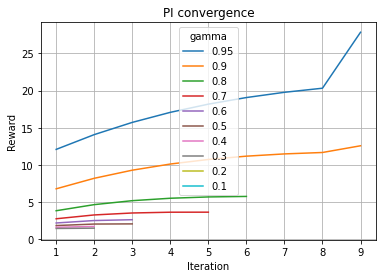

In [16]:
plt.figure()
# plt.semilogx()
plt.grid()
for g in gamma_list:
    stat = f_p_solvers[g].run_stats
    iterations = [s['Iteration'] for s in stat]
    iterations_rewards = [s['Mean V'] for s in stat]
    plt.plot(iterations, iterations_rewards)
plt.legend(gamma_list, title="gamma")
plt.title("PI convergence")
plt.xlabel("Iteration")
plt.ylabel("Reward")

In [41]:
f_p_solvers[0.95].run_stats

[{'State': None,
  'Action': None,
  'Reward': 33.62580165442884,
  'Error': 19.86838925550702,
  'Time': 0.0010006427764892578,
  'Max V': 33.62580165442884,
  'Mean V': 12.090342968677378,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 33.625801654428834,
  'Error': 16.44838925550703,
  'Time': 0.002000570297241211,
  'Max V': 33.625801654428834,
  'Mean V': 14.077181894228058,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 33.625801654428834,
  'Error': 13.524289255507002,
  'Time': 0.002000570297241211,
  'Max V': 33.625801654428834,
  'Mean V': 15.722020819778788,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 33.625801654428834,
  'Error': 11.024183755507002,
  'Time': 0.002000570297241211,
  'Max V': 33.625801654428834,
  'Mean V': 17.07444974532949,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 33.62580165442882,
  'Error': 8.88659355300702,
  'Time': 0.0030002593994140625,
  'Max V': 33.62580165442882

Text(0, 0.5, 'Time')

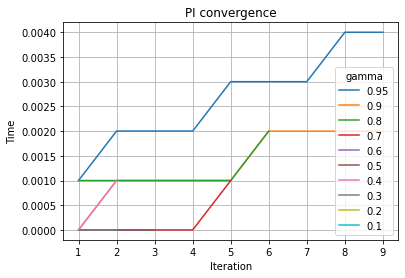

In [17]:
plt.figure()
# plt.semilogx()
plt.grid()
for g in gamma_list:
    stat = f_p_solvers[g].run_stats
    iterations = [s['Iteration'] for s in stat]
    iterations_rewards = [s['Time'] for s in stat]
    plt.plot(iterations, iterations_rewards)
plt.legend(gamma_list, title="gamma")
plt.title("PI convergence")
plt.xlabel("Iteration")
plt.ylabel("Time")

In [42]:
gamma_list = [0.95] # + [round(1+(0.1*-i), 1) for i in range(1,10)]
f_q_solvers = {}
for g in gamma_list:
    vi_solver = QLearning(P, R, gamma=g, n_iter=50e5, epsilon_decay=0.9, alpha_decay=0.9999)
    vi_solver.run()
    f_q_solvers[g] = vi_solver
#     plot_frozen_lake(map_small_2, vi_solver.policy, vi_solver.V, small_size, "VI gamma " + str(round(g, 2)) + " " + str(np.mean(vi_solver.V)))
#     vi_solver.run_stats

Text(0, 0.5, 'Reward')

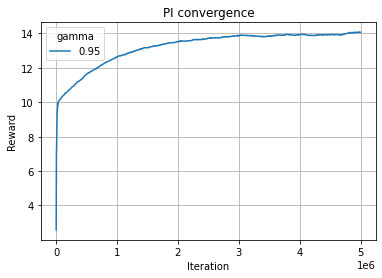

In [43]:
plt.figure()
# plt.semilogx()
plt.grid()
for g in gamma_list:
    stat = f_q_solvers[g].run_stats
    iterations = [s['Iteration'] for s in stat]
    iterations_rewards = [s['Mean V'] for s in stat]
    plt.plot(iterations, iterations_rewards)
plt.legend(gamma_list, title="gamma")
plt.title("PI convergence")
plt.xlabel("Iteration")
plt.ylabel("Reward")